### In this problem, different features of mushrooms are given and classes( namely-edible and poisonous) for rest of the cases( test-set) are predicted using machine learning algorithms

## Importing Libraries

In [495]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

In [496]:
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [497]:
import warnings
warnings.filterwarnings('ignore')


In [650]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

## Reading data

In [500]:
train=pd.read_csv('mushroom_train.csv')
test=pd.read_csv('mushroom_test.csv')

In [501]:
full=[train,test]

In [502]:
print train.shape
print test.shape

(5686, 25)
(2438, 24)


In [503]:
train.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u


In [504]:
for i in train.columns:
    print i
    print train[i].dtypes
    print train[i].unique()

class
object
['p' 'e']
cap-shape
object
['f' 'x' 'b' 'k' 's' 'c']
cap-surface
object
['s' 'y' 'f' 'g']
cap-color
object
['e' 'w' 'n' 'y' 'g' 'b' 'p' 'r' 'u' 'c']
bruises
object
['f' 't']
odor
object
['s' 'p' 'n' 'y' 'l' 'f' 'c' 'm' 'a']
gill-attachment
object
['f' 'a']
gill-spacing
object
['c' 'w']
gill-size
object
['n' 'b']
gill-color
object
['b' 'k' 'e' 'n' 'h' 'p' 'u' 'g' 'w' 'y' 'o' 'r']
stalk-shape
object
['t' 'e']
stalk-root
object
['?' 'e' 'c' 'b' 'r']
radius
int64
[ 215   94  244  286  110   66   11  207   60   84  385    3   59   57  151
  264  183  315  298   99  782  262  129   55  115  186    7  417  226    5
    9   21  495   31  618  461   30  658   39  377   45  582  102  180  196
  318    8  793   25   77  586  174   92  291  204  153 3500  134    2   86
   10  141  194   74  668  111  322  188  299  493  220  467  420  177   32
  439    4   34  446   71   67  181   36   56  416  396  288    6   53  105
  408  133   12  301  346   63  269   22  237  147   79  596  300  

In [505]:
np.mean(train['veil-type']=='p')

1.0

#### Dropping 'veil-type' as it does not provide any information

In [506]:
for data in full:
    data.drop('veil-type',axis=1,inplace=True)

In [507]:
np.mean(train['class']=='p')

0.4820612029546254

#### So the target variable is balanced among its two classes

In [508]:
for data in full:
    print np.mean(data['stalk-root']=='?')

0.303728455856
0.308859721083


#### stalk-root has some missing values

# Visualizations

### First let us take continous variables i.e. 'weight' and 'radius'

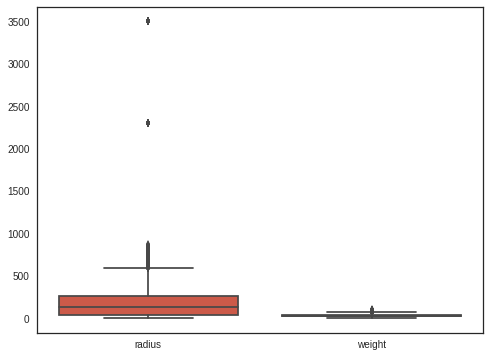

In [509]:
sns.boxplot(train)

'Radius' has some outliers present

(0, 1000)

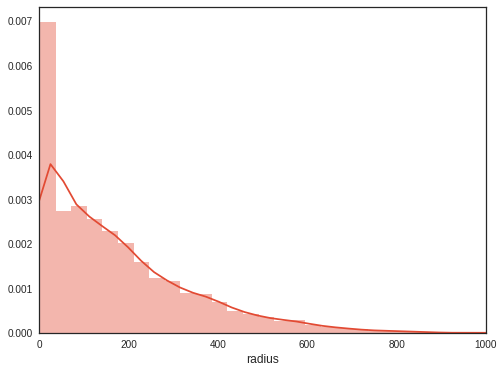

In [510]:
sns.distplot(train.radius,bins=100)
plt.xlim(0,1000)

### Outliers

In [511]:
np.mean(train.radius>1000)

0.0114315863524446

Axes(0.125,0.125;0.775x0.755)


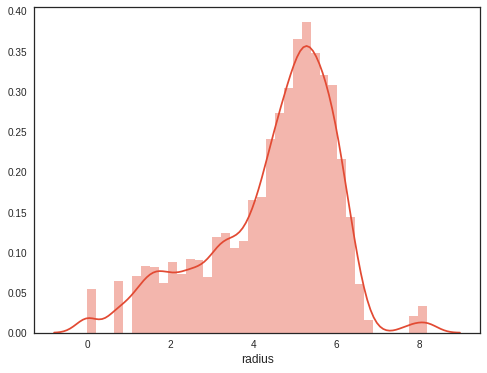

In [512]:
print sns.distplot(np.log(train.radius))

Axes(0.125,0.125;0.775x0.755)
0.0255012310939


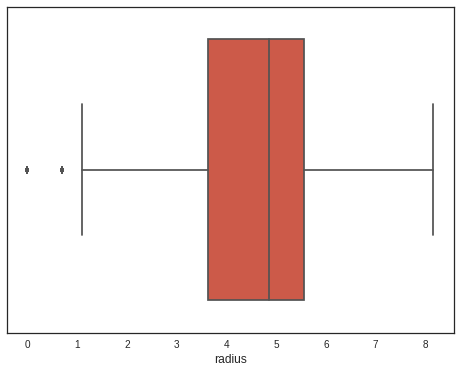

In [513]:
print sns.boxplot(np.log(train.radius))
print np.mean(np.log(train.radius)<1)

Taking log for the variable radius make it more uniform but something about outliers still needs to be done

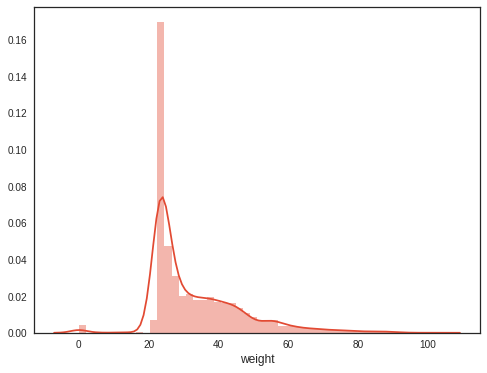

In [514]:
sns.distplot(train.weight)

In [515]:
np.sum(train.weight==0)

51

So weight has 51 null values

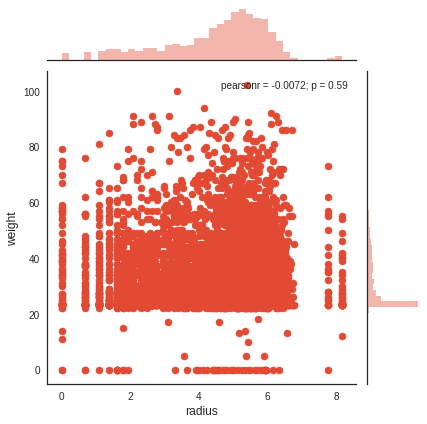

In [516]:
sns.jointplot(np.log(train.radius),(train.weight))

Both the features do not seem to correlate much

Let's check how much these features influence the target variable( i.e. class )

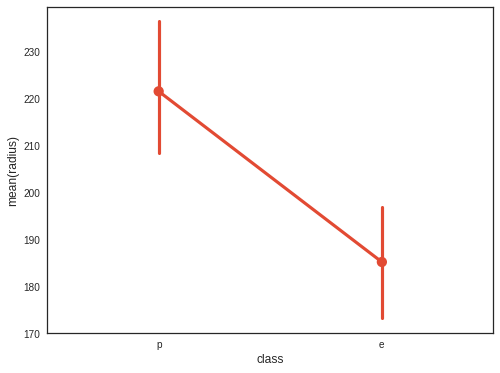

In [517]:
sns.pointplot(data=train,x='class',y='radius')

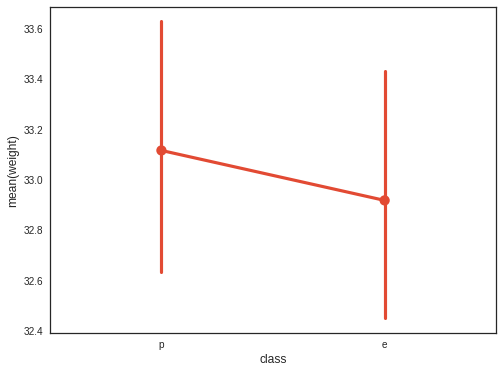

In [518]:
sns.pointplot(data=train,x='class',y='weight')

Radius influence the class significantly whereas Weight do not seem to be of much use

### Onto the categorical variables

In [519]:
test.columns

Index([u'cap-shape', u'cap-surface', u'cap-color', u'bruises', u'odor',
       u'gill-attachment', u'gill-spacing', u'gill-size', u'gill-color',
       u'stalk-shape', u'stalk-root', u'radius', u'stalk-surface-above-ring',
       u'stalk-surface-below-ring', u'stalk-color-above-ring',
       u'stalk-color-below-ring', u'veil-color', u'weight', u'ring-number',
       u'ring-type', u'spore-print-color', u'population', u'habitat'],
      dtype='object')

In [520]:
cat=[i for i in test.columns if i not in ['weight','radius']]
for data in full:
    for i in cat:
        data[i]=train[i].astype('category')

In [521]:
test.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
radius                         int64
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
weight                         int64
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [522]:
def plotter(feature):
    print sns.countplot(x=feature,data=train,hue='class')
    plt.show()

### Univariate analysis

Axes(0.125,0.125;0.775x0.755)


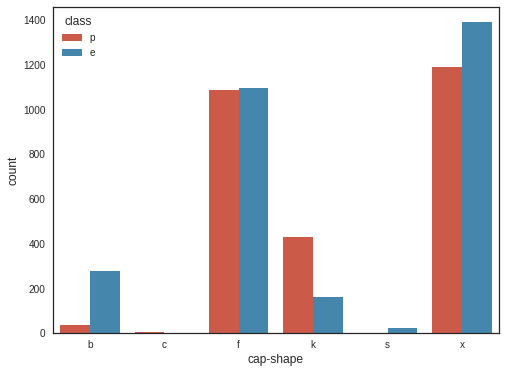

None
Axes(0.125,0.125;0.775x0.755)


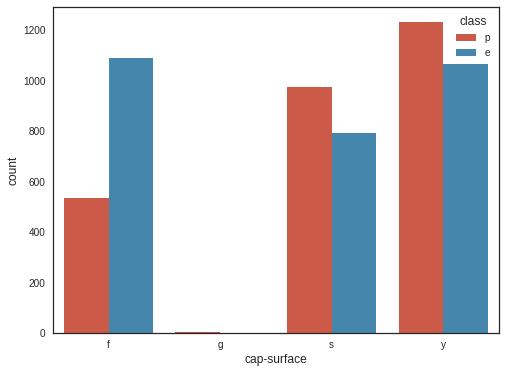

None
Axes(0.125,0.125;0.775x0.755)


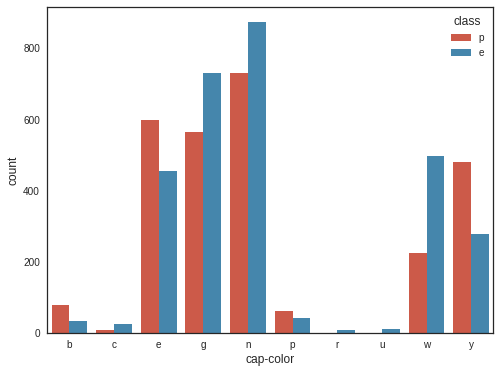

None
Axes(0.125,0.125;0.775x0.755)


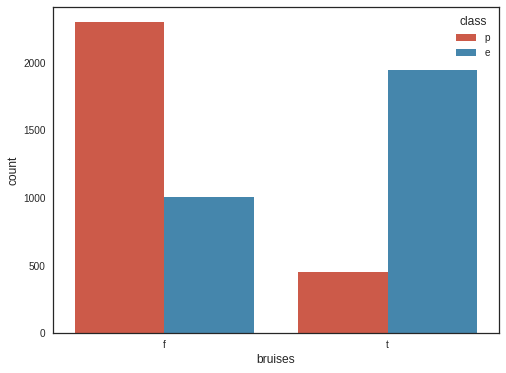

None
Axes(0.125,0.125;0.775x0.755)


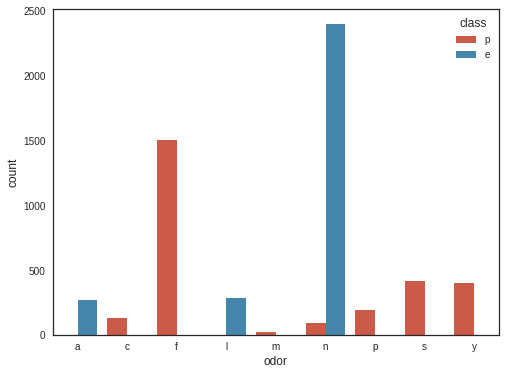

None
Axes(0.125,0.125;0.775x0.755)


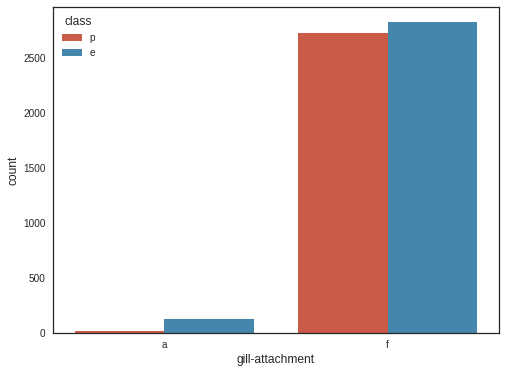

None
Axes(0.125,0.125;0.775x0.755)


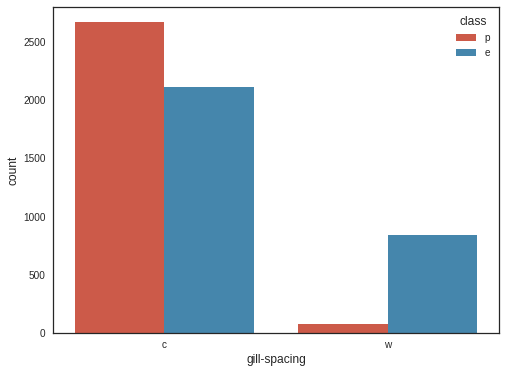

None
Axes(0.125,0.125;0.775x0.755)


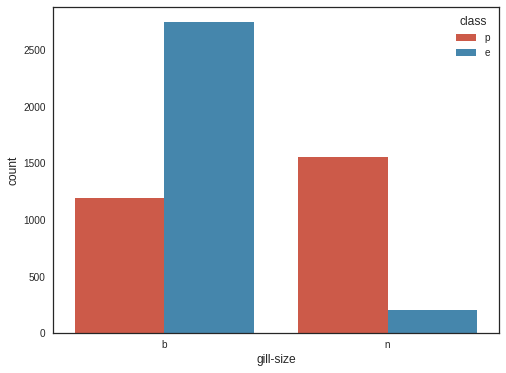

None
Axes(0.125,0.125;0.775x0.755)


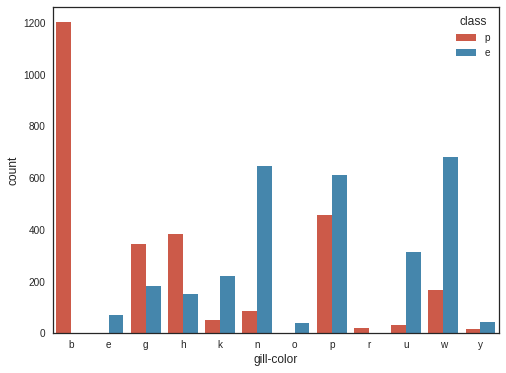

None
Axes(0.125,0.125;0.775x0.755)


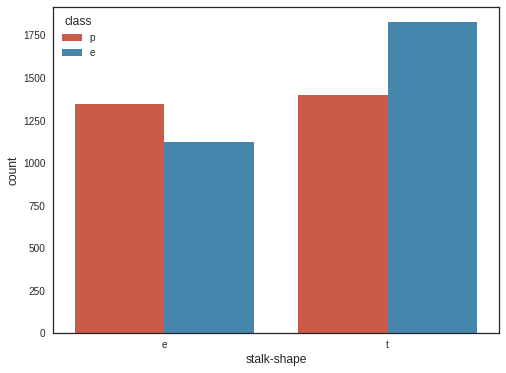

None
Axes(0.125,0.125;0.775x0.755)


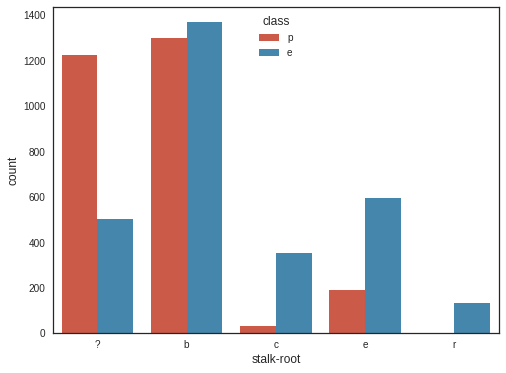

None
Axes(0.125,0.125;0.775x0.755)


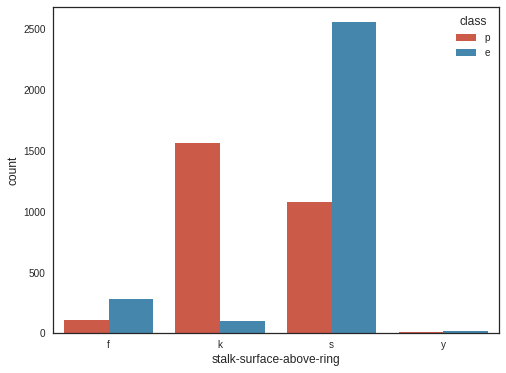

None
Axes(0.125,0.125;0.775x0.755)


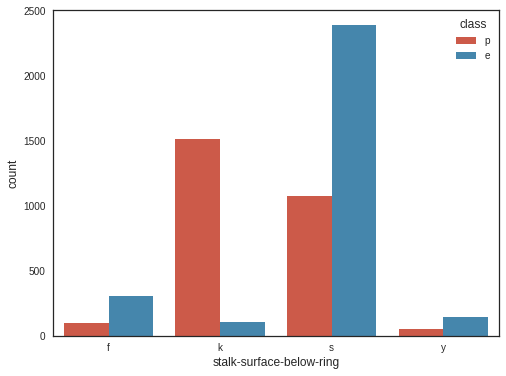

None
Axes(0.125,0.125;0.775x0.755)


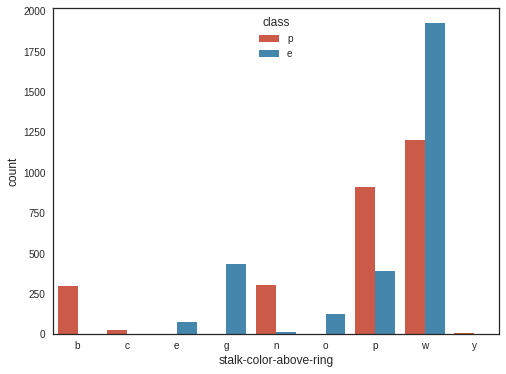

None
Axes(0.125,0.125;0.775x0.755)


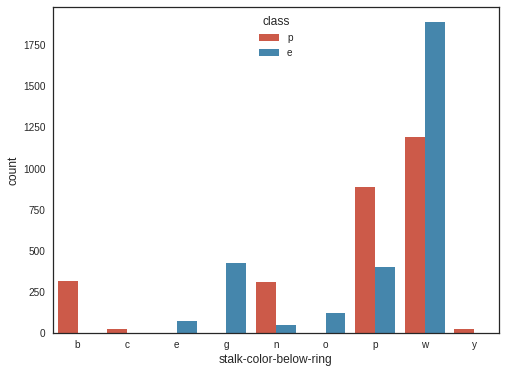

None
Axes(0.125,0.125;0.775x0.755)


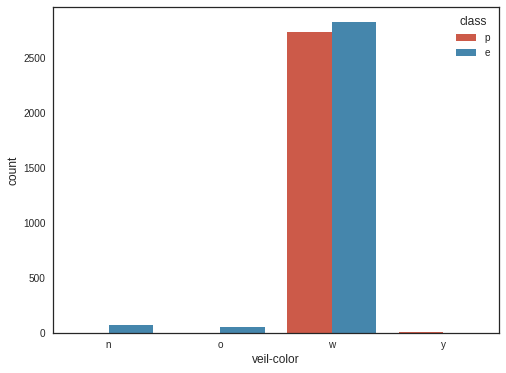

None
Axes(0.125,0.125;0.775x0.755)


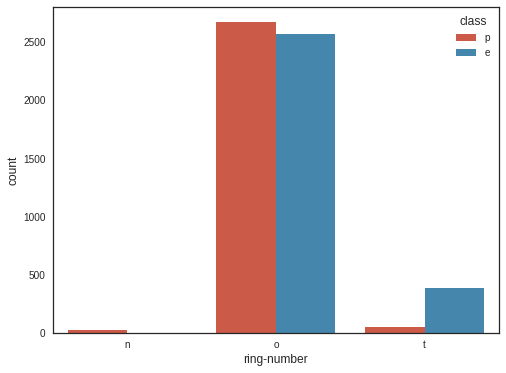

None
Axes(0.125,0.125;0.775x0.755)


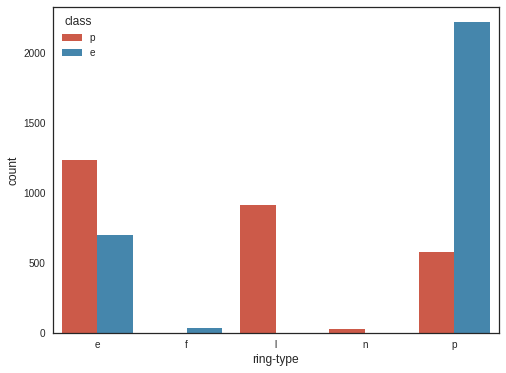

None
Axes(0.125,0.125;0.775x0.755)


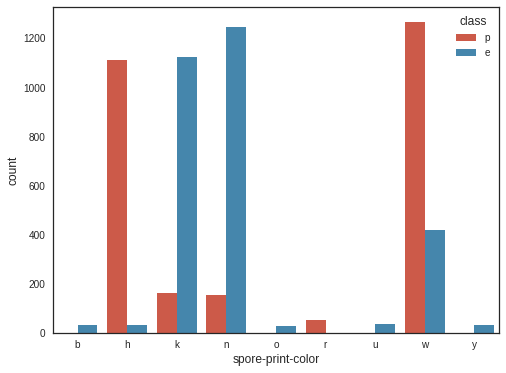

None
Axes(0.125,0.125;0.775x0.755)


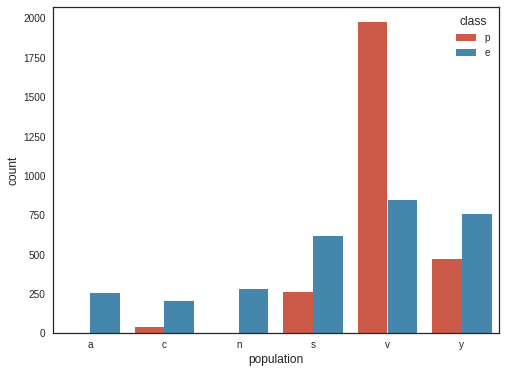

None
Axes(0.125,0.125;0.775x0.755)


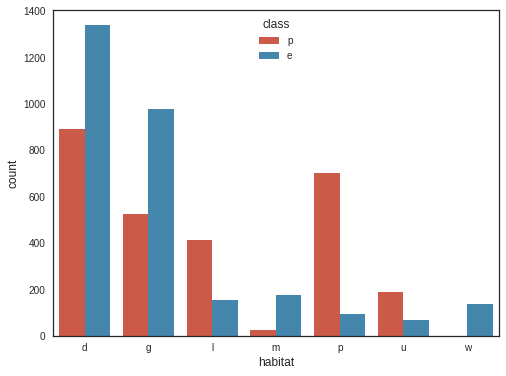

None


In [62]:
for i in cat:
    print plotter(i)

### Inference from visualizations above
1) __'Bruises'__ is an important feature<br>
2) In __'odor'__- c,f,p,s,y- contain only poisonous class and a,l,n contain edible class  
3) __'gill-attachment'__ doesn't seem like an important feature<br>
4) In __'gill-color'__- b is always poisonous<br>
5) __'veil-color'__ doesn't seem like an important feature<br>
6) In __'spore-print color'__- h,w are mostly poisonous and k,n are mostly edible<br>

## Developing hypothesis and confirming them with plots

Let's see how these pairs vary together(__bi-variate analysis__)<br>
1) cap-shape and radius<br>
2) cap-color and odor<br>
3) gill-size and weight<br>
4) gill-color and cap-color<br>
5) ring-type and ring-number<br>
6) population and habitat<br>
7) bruises and odor<br>
8) stalk-shape and cap-shape

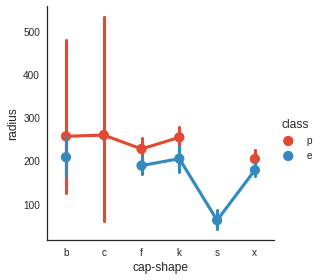

In [78]:
sns.factorplot(x='cap-shape',y='radius',hue='class',data=train)

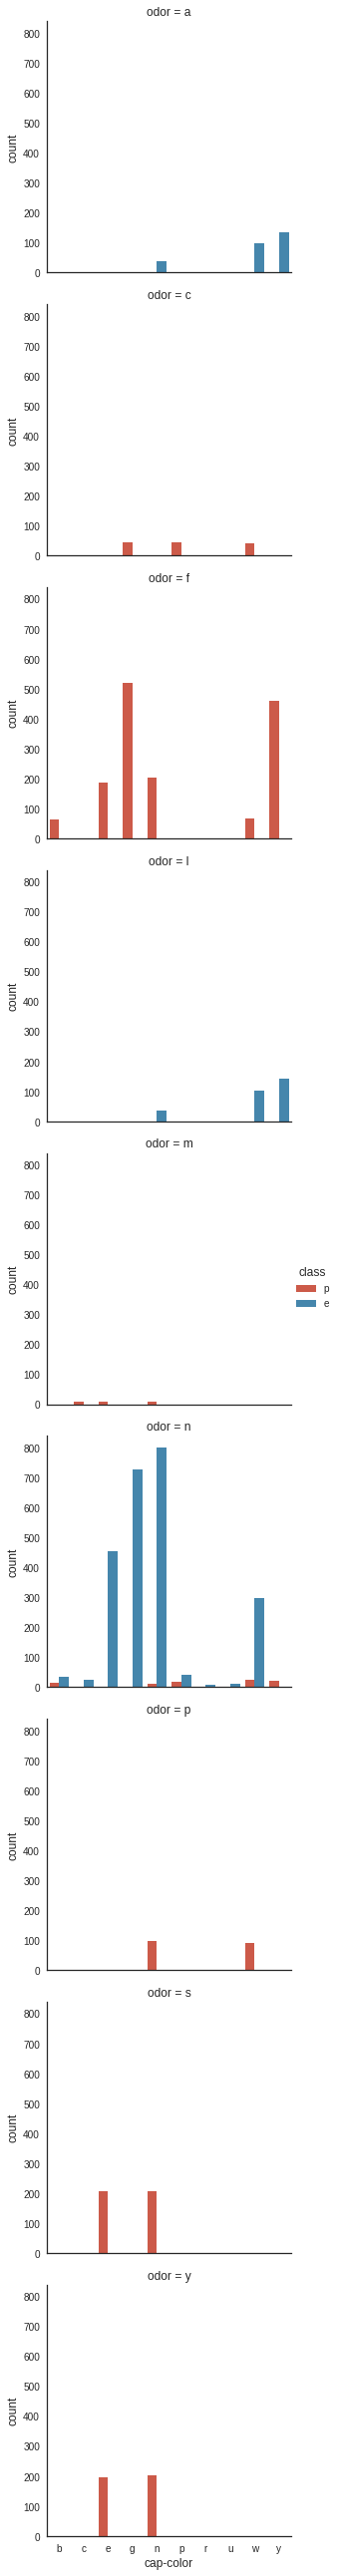

In [84]:
sns.factorplot(x='cap-color',hue='class',row='odor',data=train,kind='count')

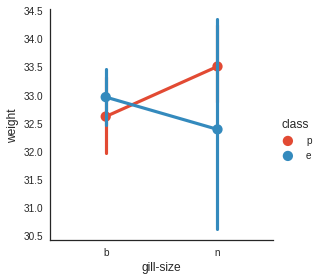

In [81]:
sns.factorplot(x='gill-size',y='weight',hue='class',data=train)

__Data having broad gill-size if poisonous have low average weight and if edible have high average weight and vice-versa for narrow gill-size__

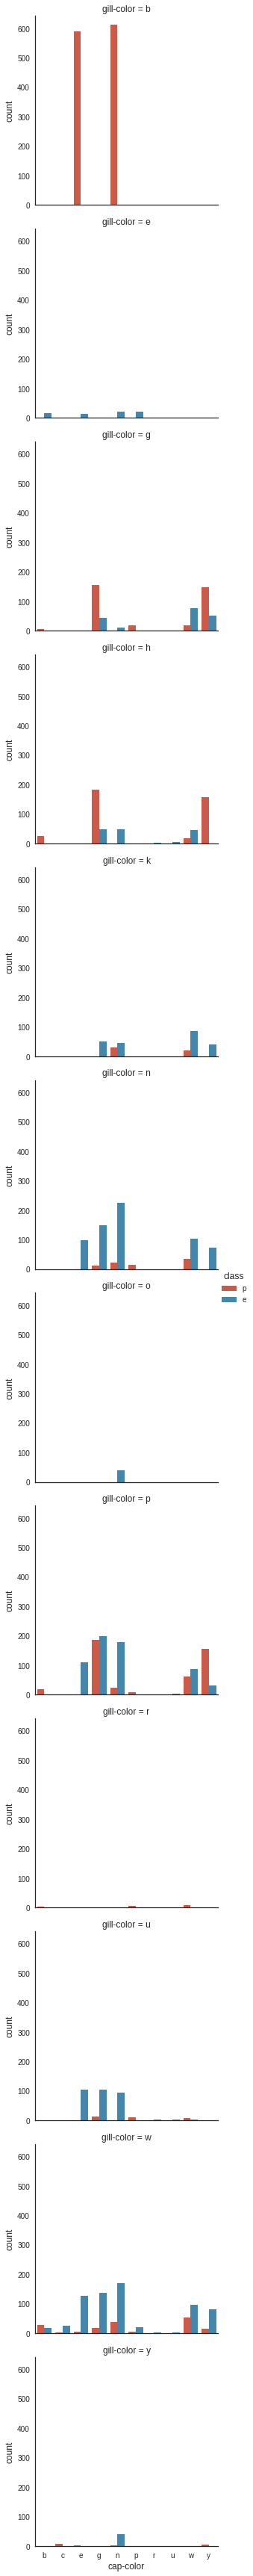

In [91]:
sns.factorplot(x='cap-color',hue='class',row='gill-color',data=train,kind='count')

__'gill-color'- b with 'cap-color'- e and n tends to have mostly poisonous class mushroom__

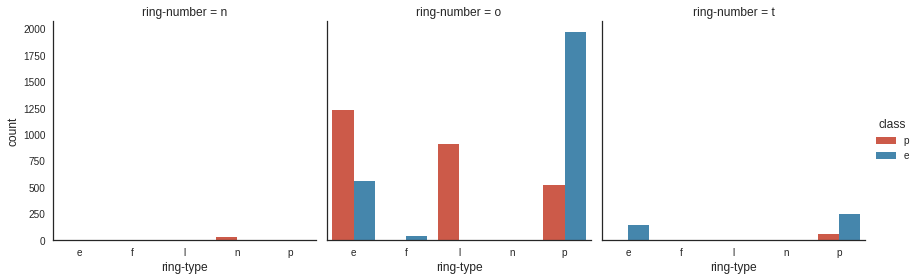

In [94]:
sns.factorplot(x='ring-type',hue='class',col='ring-number',data=train,kind='count')

__ 'ring-number'-o and 'ring-type'-l have almost all cases of poisonous mushrooms__

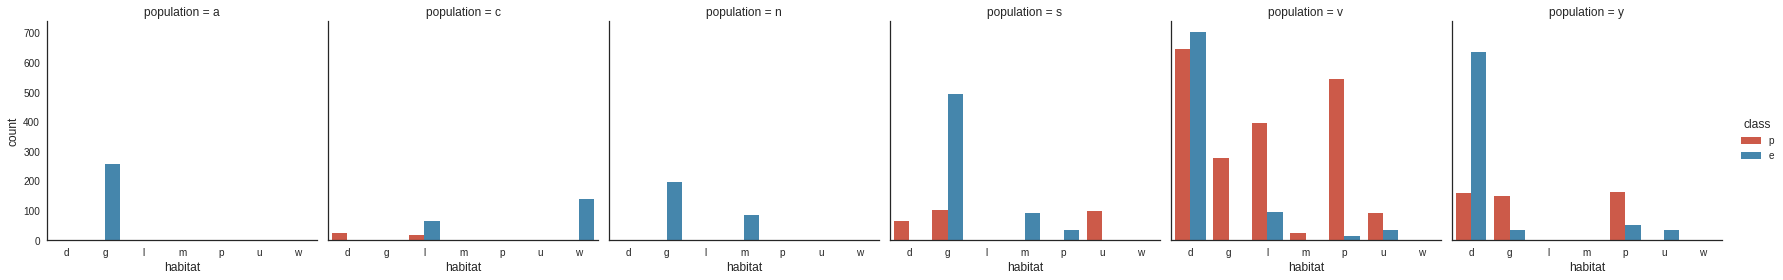

In [96]:
sns.factorplot(x='habitat',hue='class',col='population',data=train,kind='count')

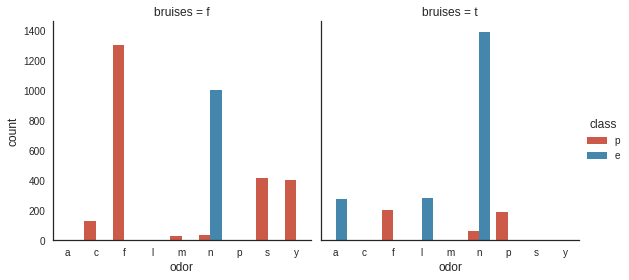

In [99]:
sns.factorplot(x='odor',hue='class',col='bruises',data=train,kind='count')

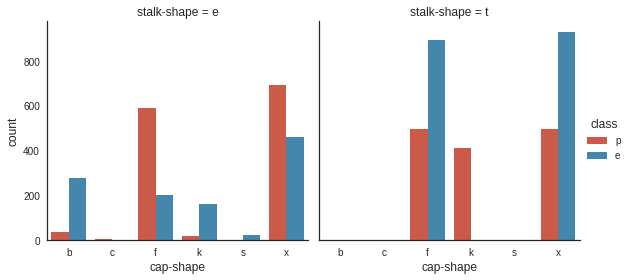

In [98]:
sns.factorplot(x='cap-shape',hue='class',col='stalk-shape',data=train,kind='count')

__'stalk-shape-t and cap-shape-k have mostly poisonous class__

### I did this only for 8 cases out of 23C2 cases, so there is a high chance I might be missing on some<br> valuable insight

__ Let's check if features 'stalk-surface above ring' and 'stalk-surface below ring' match or not, and what is the 'class' in the cases where they do not match__

In [101]:
train[train['stalk-surface-above-ring']==train['stalk-surface-below-ring']].shape

(4403, 24)

__similarly for color__

In [102]:
train[train['stalk-color-above-ring']==train['stalk-color-below-ring']].shape

(3516, 24)

Note that number is not same in both cases

Let's see value count of different 'class' when surface above is same as that of below the stalk, and when it is different

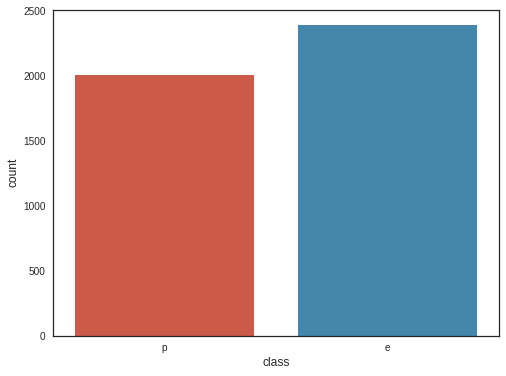

In [104]:
same_surface=train[train['stalk-surface-above-ring']==train['stalk-surface-below-ring']]
sns.countplot(x='class',data=same_surface)

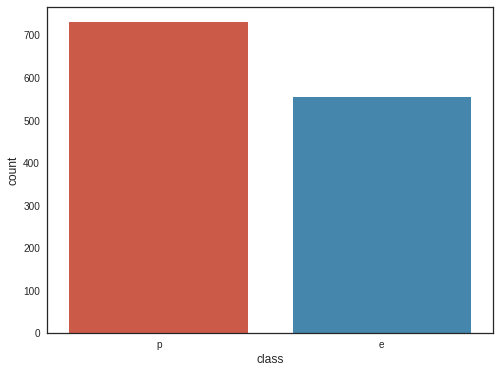

In [105]:
diff_surface=train[train['stalk-surface-above-ring']!=train['stalk-surface-below-ring']]
sns.countplot(x='class',data=diff_surface)

__The effect is not signicant, let's try the same for color__

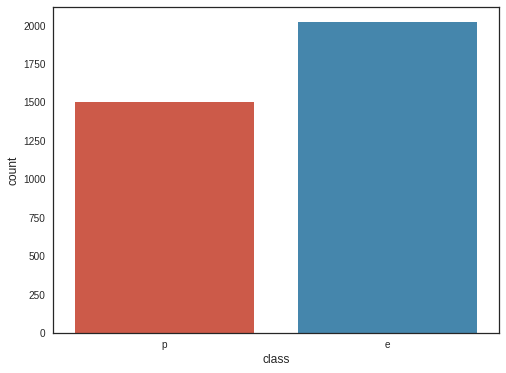

In [106]:
same_color=train[train['stalk-color-above-ring']==train['stalk-color-below-ring']]
sns.countplot(x='class',data=same_color)

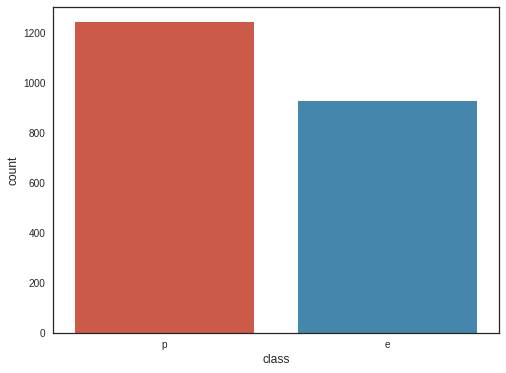

In [107]:
diff_color=train[train['stalk-color-above-ring']!=train['stalk-color-below-ring']]
sns.countplot(x='class',data=diff_color)

__In both cases of different color and surface number of poisonous is greater than edible, let's see what happens if we take both of them into account at the same time__

In [109]:
diff=train[(train['stalk-color-above-ring']!=train['stalk-color-below-ring'])&(train['stalk-surface-above-ring']!=train['stalk-surface-below-ring'])]

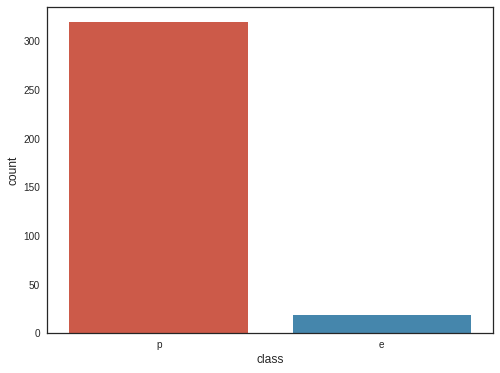

In [111]:
sns.countplot(x='class',data=diff)

__As is visible it has mostly poisonous class mushroom__

## Data Pre-processing

In [523]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,k,p,w,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,s,w,w,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,s,e,e,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,s,p,w,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,s,w,w,w,36,o,p,n,s,m


__Changing missing values to a replacable format__

In [524]:
for data in full:
    data['weight'].replace(to_replace=0,value=np.nan,inplace=True)
    data['stalk-root'].replace(to_replace='?',value=np.nan,inplace=True)

In [525]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 24 columns):
class                       5686 non-null object
cap-shape                   5686 non-null category
cap-surface                 5686 non-null category
cap-color                   5686 non-null category
bruises                     5686 non-null category
odor                        5686 non-null category
gill-attachment             5686 non-null category
gill-spacing                5686 non-null category
gill-size                   5686 non-null category
gill-color                  5686 non-null category
stalk-shape                 5686 non-null category
stalk-root                  3959 non-null category
radius                      5686 non-null int64
stalk-surface-above-ring    5686 non-null category
stalk-surface-below-ring    5686 non-null category
stalk-color-above-ring      5686 non-null category
stalk-color-below-ring      5686 non-null category
veil-color                  568

Null values for weight can simply be replaced with median of the weight

In [526]:
for data in full:
    data['weight'].fillna(train['weight'].median(),inplace=True)

__Converting radius to log__

In [527]:
for data in full:
    data['radius']=np.log(data['radius'])

__Dropping outliers__

In [528]:
ind=train.loc[train.radius<1].index
train.drop(ind,inplace=True)
train.shape

(5541, 24)

In [529]:
target=train['class']
train.drop('class',axis=1,inplace=True)

__Applying One Hot Encoding to the nominal categorical features using get_dummies method of pandas__

In [530]:
train.shape

(5541, 23)

In [531]:
lis=[j for j in train.columns if j not in ['ring-number','stalk-root','radius','weight']]

In [532]:
for i,p in zip(lis,range(len(lis))):
    X=pd.get_dummies(train[i],prefix=p)
    train=train.join(X)

In [533]:
for i,p in zip(lis,range(len(lis))):
    X=pd.get_dummies(test[i],prefix=p)
    test=test.join(X)

In [534]:
A=np.array(train.columns)
B=np.array(test.columns)
C=np.intersect1d(A,B)

In [535]:
print A.shape
print B.shape
print C.shape

(131,)
(131,)
(131,)


__So encoding is proper i.e. there is no case of less encoded features in test set due to the absence of any class in a particular feature__

__Converting 'ring-number' into an ordinal feature__

In [536]:
dic={'n':0,'o':1,'t':2}
train['ring-number']=train['ring-number'].map(dic)
test['ring-number']=test['ring-number'].map(dic)

__Dropping variables__

In [537]:
train.drop(lis,axis=1,inplace=True)
test.drop(lis,axis=1,inplace=True)

In [538]:
train.columns

Index([u'stalk-root', u'radius', u'weight', u'ring-number', u'0_b', u'0_c',
       u'0_f', u'0_k', u'0_s', u'0_x',
       ...
       u'17_s', u'17_v', u'17_y', u'18_d', u'18_g', u'18_l', u'18_m', u'18_p',
       u'18_u', u'18_w'],
      dtype='object', length=112)

__For imputing missing values of stalk-root we'll use a Extra-trees classifier__

In [539]:
dic={'b':1,'c':2,'u':3,'e':4,'z':5,'r':6}
train['stalk-root']=train['stalk-root'].map(dic)
test['stalk-root']=test['stalk-root'].map(dic)

__First creating a concatanated dataframe from train and test set which contains stalk-root as target__

In [540]:
impute_train=pd.concat([train[train['stalk-root'].notnull()],test[test['stalk-root'].notnull()]])

In [541]:
impute_features=[i for i in impute_train.columns if i not in ['stalk-root']]
impute_target=['stalk-root']

__Creating training and testing sets for parameter tuning__

In [542]:
impute_train['stalk-root']=impute_train['stalk-root'].astype('int')

In [543]:
xtrain,xtest,ytrain,ytest=train_test_split(impute_train[impute_features].values,np.ravel(impute_train[impute_target].values))

In [544]:
print xtrain.shape
print xtest.shape

(4162, 111)
(1388, 111)


In [545]:
params={'n_estimators':[10,50,100,150],'max_depth':[4,5,6,7,8,9]}
clf_imp=ExtraTreesClassifier()
clf_imp_grid=GridSearchCV(estimator=clf_imp,param_grid=params,cv=5)
clf_imp_grid.fit(xtrain,ytrain)
print clf_imp_grid.best_params_
print clf_imp_grid.best_score_
clf_imputer=clf_imp_grid.best_estimator_

{'n_estimators': 100, 'max_depth': 5}
1.0


In [546]:
clf_imputer.fit(xtrain,ytrain)
print accuracy_score(ytrain,clf_imputer.predict(xtrain))
print accuracy_score(ytest,clf_imputer.predict(xtest))

1.0
1.0


In [547]:
pd.value_counts(np.array(clf_imputer.predict(xtrain)))

1    2802
4     845
2     385
6     130
dtype: int64

__Our imputer is working well__

__Imputing the missing values using this model__

In [548]:
impute_test=pd.concat([train[train['stalk-root'].isnull()],test[test['stalk-root'].isnull()]])
X=impute_test[impute_features].values

In [549]:
CLF=ExtraTreesClassifier(n_estimators=150,max_depth=5)
CLF.fit(impute_train[impute_features].values,np.ravel(impute_train[impute_target].values))
predict_im=CLF.predict(X)   

In [565]:
impute_test['stalk-root']=predict_im
val_train=impute_test['stalk-root'][:1683]
val_test=impute_test['stalk-root'][1683:]

In [567]:
train['stalk-root'].fillna(val_train,inplace=True)
test['stalk-root'].fillna(val_test,inplace=True)

__Checking__

In [568]:
print np.sum(train['stalk-root'].isnull())
print np.sum(test['stalk-root'].isnull())

0
0


__Creating dummy variable for 'stalk-root'__

In [569]:
X=pd.get_dummies(train['stalk-root'])
train=train.join(X)
Y=pd.get_dummies(test['stalk-root'])
test=test.join(Y)
train.drop('stalk-root',axis=1,inplace=True)
test.drop('stalk-root',axis=1,inplace=True)

In [570]:
train.head(2)

,radius,weight,ring-number,0_b,0_c,0_f,0_k,0_s,0_x,1_f,...,18_g,18_l,18_m,18_p,18_u,18_w,1.0,2.0,4.0,6.0
0,5.370638,38.0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,4.543295,43.0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [571]:
test.head(2)

,radius,weight,ring-number,0_b,0_c,0_f,0_k,0_s,0_x,1_f,...,18_g,18_l,18_m,18_p,18_u,18_w,1.0,2.0,4.0,6.0
0,3.465736,23,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1.945910,23,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


## Feature Engineering (Creating new features)

In [572]:
train1=pd.read_csv('mushroom_train.csv')
test1=pd.read_csv('mushroom_test.csv')

__Below listed features are needed again for some feature engineering, we'll drop them again once their use is over__

In [573]:
train['stalk-color-above-ring']=train1['stalk-color-above-ring']
train['stalk-color-below-ring']=train1['stalk-color-below-ring']
train['stalk-surface-above-ring']=train1['stalk-surface-above-ring']
train['stalk-surface-below-ring']=train1['stalk-surface-below-ring']

In [574]:
test['stalk-color-above-ring']=test1['stalk-color-above-ring']
test['stalk-color-below-ring']=test1['stalk-color-below-ring']
test['stalk-surface-above-ring']=test1['stalk-surface-above-ring']
test['stalk-surface-below-ring']=test1['stalk-surface-below-ring']

__Features are formed on the basis of inferences from the visualizations of first section of this notebook__

In [575]:
train['feat_1']=0
train['feat_2']=0
train['feat_3']=0
train['feat_4']=0
train['feat_5']=0
train['feat_6']=0
train['feat_7']=0
train['feat_8']=0
train.loc[((train['7_b']==1)&(train['weight']<train['weight'].mean))|((train['7_n']==1)&(train['weight']>train['weight'].mean())),'feat_1']=1
train.loc[(train['8_b']==1)&((train['2_e']==1)|(train['2_n']==1)),'feat_2']=1
train.loc[(train['ring-number']==1)&(train['15_l']==1),'feat_3']=1
train.loc[(train['9_e']==1)&(train['0_k']==1),'feat_4']=1
train.loc[(train['stalk-color-above-ring']!=train['stalk-color-below-ring'])&(train['stalk-surface-above-ring']!=train['stalk-surface-below-ring']),'feat_5']=1
train.loc[(train['4_c']==1)|(train['4_f']==1)|(train['4_p']==1)|(train['4_s']==1)|(train['4_y']==1),'feat_6']=1
train.loc[(train['16_h']==1)|(train['16_w']==1),'feat_7']=1
train.loc[(train['16_k']==1)|(train['16_n']==1),'feat_7']=1

In [576]:
test['feat_1']=0
test['feat_2']=0
test['feat_3']=0
test['feat_4']=0
test['feat_5']=0
test['feat_6']=0
test['feat_7']=0
test['feat_8']=0
test.loc[((test['7_b']==1)&(test['weight']<test['weight'].mean))|((test['7_n']==1)&(test['weight']>test['weight'].mean())),'feat_1']=1
test.loc[(test['8_b']==1)&((test['2_e']==1)|(test['2_n']==1)),'feat_2']=1
test.loc[(test['ring-number']==1)&(test['15_l']==1),'feat_3']=1
test.loc[(test['9_e']==1)&(test['0_k']==1),'feat_4']=1
test.loc[(test['stalk-color-above-ring']!=test['stalk-color-below-ring'])&(test['stalk-surface-above-ring']!=test['stalk-surface-below-ring']),'feat_5']=1
test.loc[(test['4_c']==1)|(test['4_f']==1)|(test['4_p']==1)|(test['4_s']==1)|(test['4_y']==1),'feat_6']=1
test.loc[(test['16_h']==1)|(test['16_w']==1),'feat_7']=1
test.loc[(test['16_k']==1)|(test['16_n']==1),'feat_7']=1

In [577]:
train.drop(['stalk-color-above-ring','stalk-color-below-ring','stalk-surface-above-ring','stalk-surface-below-ring'],axis=1,inplace=True)
test.drop(['stalk-color-above-ring','stalk-color-below-ring','stalk-surface-above-ring','stalk-surface-below-ring'],axis=1,inplace=True)

In [578]:
train.head(2)

,radius,weight,ring-number,0_b,0_c,0_f,0_k,0_s,0_x,1_f,...,4.0,6.0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8
0,5.370638,38.0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,1,1,0
1,4.543295,43.0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [579]:
test.head(2)

,radius,weight,ring-number,0_b,0_c,0_f,0_k,0_s,0_x,1_f,...,4.0,6.0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8
0,3.465736,23,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1.945910,23,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0


## Modelling

__We are finally in a state to apply different machine learning algorithms to our data, to predict differnt categories of mushroom for the test set__

Label-encoding target class

In [584]:
dic={'p':1,'e':2}
target=target.map(dic)

### Algorithm selection with cross-validation

Here I've considered 4 algorithms namely-<br>
Logistic Regression<br>
Random Forest Classifier<br>
Extra Trees Classifier &<br>
Support Vector Machines

In [660]:
xtrain,xtest,ytrain,ytest=train_test_split(train.values,target.values,test_size=0.20)
print xtrain.shape
print xtest.shape

(4432, 123)
(1109, 123)


In [657]:
clf_1=LogisticRegression()
scores=cross_val_score(clf_1,xtrain,ytrain,scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
clf_1.fit(xtrain,ytrain)
print accuracy_score(ytrain,clf_1.predict(xtrain))
print accuracy_score(ytest,clf_1.predict(xtest))
pred=clf_1.predict(xtrain)

CV accuracy: 1.000 +/- 0.000
1.0
1.0


In [661]:
clf_2=RandomForestClassifier()
scores=cross_val_score(clf_2,train.values,target.values,scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
clf_2.fit(xtrain,ytrain)
print accuracy_score(ytrain,clf_2.predict(xtrain))
print accuracy_score(ytest,clf_2.predict(xtest))

CV accuracy: 1.000 +/- 0.000
1.0
1.0


### Feature importance by random-forest

In [689]:
##using numpy and random-forest in-built feature_importance_ attribute
index=np.argsort(clf_2.feature_importances_)[::-1]
col=train.columns[index]
for i,j in zip(col,np.sort(clf_2.feature_importances_)[::-1]):
    print i,j

feat_6 0.405899405156
3_f 0.074414833752
7_n 0.0606161164097
4_n 0.0489676770178
15_p 0.0482793970509
feat_3 0.0421066096871
16_h 0.0350841021311
10_k 0.0240759663125
18_g 0.0234057613779
17_v 0.0233445009963
13_w 0.0232076691251
4_f 0.0200385333658
16_k 0.0148140514641
1.0 0.0132128688825
18_d 0.00789299055873
4_c 0.0076328170749
13_o 0.00626814526355
feat_7 0.00613168924532
16_r 0.00601914386691
ring-number 0.0059218795651
6_w 0.00587561279524
feat_2 0.00578958464165
12_w 0.00531429403683
11_f 0.00524402026415
15_f 0.00520644869502
8_b 0.00471605837971
13_e 0.00451786551703
feat_1 0.00445445631885
7_b 0.0042268731295
9_t 0.00413581955482
17_y 0.00400612856372
0_b 0.00327276771343
6_c 0.00289697740617
17_s 0.0028779050957
11_y 0.00283425153987
10_s 0.00220974430998
8_r 0.00201972197211
3_t 0.00200656679052
8_e 0.00189984730938
16_w 0.00175733321453
4_a 0.00169357557085
13_c 0.0016517647483
2_n 0.00152126914787
13_n 0.00151263398115
18_m 0.00149186370724
2_g 0.00147616316332
feat_5 0.0

In [690]:
features=col[:50]

 __Engineered features are working pretty well__

__Let's standardize radius and weight__

In [651]:
data=train[['weight','radius']]
stdsc=StandardScaler()
data_std=stdsc.fit_transform(data)

In [653]:
train[['weight','radius']]=data_std

__Let's fit our data again__

In [674]:
clf_3=RandomForestClassifier()
scores=cross_val_score(clf_3,train.values,target.values,scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
clf_3.fit(xtrain,ytrain)
print accuracy_score(ytrain,clf_3.predict(xtrain))
print accuracy_score(ytest,clf_3.predict(xtest))
index=np.argsort(clf_3.feature_importances_)[::-1]
col=train.columns[index]
for i,j in zip(col,np.sort(clf_3.feature_importances_)[::-1]):
    print i,j

CV accuracy: 1.000 +/- 0.000
1.0
1.0
4_f 0.136096176128
8_b 0.127786901323
16_h 0.0714299695422
feat_6 0.0691141978706
11_k 0.0665579745338
4_n 0.0625874055507
7_n 0.0556263063403
7_b 0.0433625539355
feat_1 0.0369437381336
feat_2 0.0349253498899
11_s 0.0272218202577
10_s 0.0265204025233
4_p 0.0211064427174
4_s 0.0171350742581
13_w 0.016084132084
ring-number 0.0126811730359
18_u 0.0124666586593
1.0 0.0123801054089
17_v 0.00951089289062
15_p 0.00898874905987
feat_7 0.00830754782996
15_e 0.00611460703936
16_r 0.00610683178589
18_d 0.00602021638604
3_t 0.00590192419998
11_f 0.00513847519561
9_e 0.0047722266935
8_r 0.00459908180515
4_c 0.00433927882842
2_p 0.00428568102026
17_y 0.00412211521963
3_f 0.00398973590092
16_w 0.00391082073035
12_w 0.00357018072346
11_y 0.00325954346714
16_n 0.00303402884234
0_b 0.00289421930978
12_g 0.00286771118314
4_a 0.0028475963205
16_k 0.00281372372136
4.0 0.00277144693953
6_c 0.00276129151579
17_c 0.0027106074514
12_c 0.00269065691482
2_y 0.00247313006225
1

__Results are not in favour__

In [659]:
train[['weight','radius']]=data

__We'll take top 50 features for training our data__

__As is visible there is no need to explore other algorithms, so we'll stick with Random Forest and train on full data__

__ To save computational cost we did not tune the hyperparameters as training and testing score were 1 (which is kind of weird)__

In [691]:
features.shape

(50,)

In [692]:
clf_final=RandomForestClassifier()
clf_final.fit(train[features].values,target.values)
pred=clf_final.predict(test[features].values)
print 'training accuracy'
print accuracy_score(target.values,clf_final.predict(train[features].values))

training accuracy
1.0


In [693]:
index=np.argsort(clf_final.feature_importances_)[::-1]
col=train[features].columns[index]
for i,j in zip(col,np.sort(clf_3.feature_importances_)[::-1]):
    print i,j

feat_6 0.136096176128
4_f 0.127786901323
4_n 0.0714299695422
7_n 0.0691141978706
3_t 0.0665579745338
8_b 0.0625874055507
10_k 0.0556263063403
17_v 0.0433625539355
ring-number 0.0369437381336
16_r 0.0349253498899
15_p 0.0272218202577
18_d 0.0265204025233
4_a 0.0211064427174
feat_1 0.0171350742581
7_b 0.016084132084
13_c 0.0126811730359
6_w 0.0124666586593
feat_7 0.0123801054089
8_r 0.00951089289062
1.0 0.00898874905987
11_y 0.00830754782996
12_w 0.00611460703936
18_u 0.00610683178589
3_f 0.00602021638604
17_y 0.00590192419998
17_s 0.00513847519561
15_n 0.0047722266935
15_e 0.00459908180515
13_o 0.00433927882842
9_t 0.00428568102026
6_c 0.00412211521963
16_w 0.00398973590092
feat_5 0.00391082073035
16_k 0.00357018072346
18_m 0.00325954346714
13_w 0.00303402884234
16_h 0.00289421930978
10_s 0.00286771118314
0_b 0.0028475963205
18_g 0.00281372372136
2_g 0.00277144693953
feat_3 0.00276129151579
13_n 0.0027106074514
11_f 0.00269065691482
8_e 0.00247313006225
2_n 0.00221756436441
feat_2 0.002

In [694]:
##Encoding classes
dic={1:'p',2:'e'}
Predictions=pd.DataFrame(pred,columns=['predicted_class'])
Predictions['predicted_class']=Predictions['predicted_class'].map(dic)
Predictions.to_csv('Prediction.csv')